# COVID-19 Modeling Final Project Approach Examples.

### Install relevant libraries

#### Import libraries

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# show plots inline for notebooks
%matplotlib inline

#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv


## Part 1: Load and Clean Data

Load data about COVID-19 by USA Counties into Pandas dataframe.

In [7]:
rawDF = pd.read_csv('../data/time_series_covid19_confirmed_US.csv')
rawDF.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061


In [8]:
rawDF.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1371,1433,1442,1476,1476,1547,1570,1606,1644,1655
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,920,950,982,1016,1016,1037,1037,1046,1070,1089
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,315,325,339,395,395,415,417,428,441,468
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,372,372,383,386,386,396,396,396,397,409


In [9]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 326 entries, UID to 12/1/20
dtypes: float64(3), int64(317), object(6)
memory usage: 8.3+ MB


## I want to visualize data on a county in Texas

In [10]:
rawDFTex = rawDF[rawDF['Province_State'] == 'Texas']
rawDFTex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 2698 to 2953
Columns: 326 entries, UID to 12/1/20
dtypes: float64(3), int64(317), object(6)
memory usage: 654.0+ KB


In [11]:
rawDFTex.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
2698,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,...,3127,3118,3143,3150,3171,3172,3167,3167,3167,3190
2699,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,...,977,977,977,1018,1018,1018,1018,1018,1018,1066
2700,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,...,2515,2515,2555,2587,2587,2587,2587,2587,2587,2641
2701,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,...,393,393,398,402,404,404,407,416,416,438
2702,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,...,231,231,244,248,251,251,251,260,260,260


## I have family in Austin, so lets choose to analyse that county

In [12]:
rawDFDallas = rawDFTex[rawDFTex['Admin2'] == 'Austin']
rawDFDallas.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
2705,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,562,571,579,590,592,600,604,617,632,643


## Part 2: Plot Cumulative, daily and dates of interest

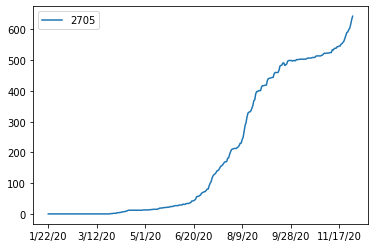

In [13]:
rawDFDallas.transpose().iloc[11:].plot()

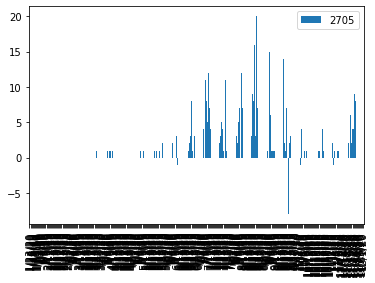

In [14]:
rawDFDallas.transpose().iloc[12:].diff(axis=0).plot(kind='bar')

## Lets plot the when major events took place

<img src="texasdates.PNG" width="500" height="600">

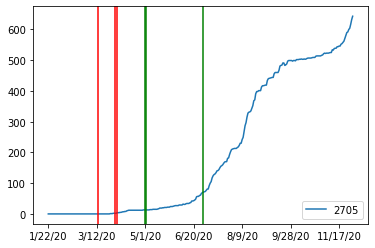

In [15]:
#Source: https://www.elpasotimes.com/story/news/2020/07/03/covid-texas-coronavirus-timeline-greg-abbott-close-reopen/5368894002/

disasterdecleration = '3/13/20'
stayhomeorder = '3/31/20'
stayhomeextended = '4/12/20'

phase1reopen = '5/1/20'
phase2reopen = '5/18/20'
phase3reopen = '6/3/20'

fig, ax = plt.subplots()

rawDFDallas.transpose().iloc[11:].plot(ax=ax)
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(disasterdecleration),color="red")
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(stayhomeorder),color="red")
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(stayhomeextended),color="red")
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(phase1reopen),color="green")
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(phase2reopen),color="green")
ax.axvline(rawDFDallas.transpose().iloc[11:].index.searchsorted(phase3reopen),color="green")

## Modelling Examples (for Part 3 and 4) - Fitting Linear and Sigmoid Functions 

In [16]:
rawDF = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

rawDF['dateRep']= pd.to_datetime(rawDF['dateRep'],dayfirst=True)
rawDF.head()
dfCases = rawDF.pivot(index='dateRep', columns='countriesAndTerritories', values='cases')
dfCases = dfCases[:333]   #Cutoff around end of Nov

dfCases['log_USA'] = np.log(dfCases["United_States_of_America"])

In [17]:
begin_idx = 67
windows_size = 21

In [18]:
N_days = len(dfCases.iloc[begin_idx:])
X = np.reshape(range(1,N_days+1),(1,N_days)).reshape(-1,1)

In [29]:
print(X.shape)
print(N_days)
print(begin_idx)
print(X[1][0])

(266, 1)
266
67
2


In [131]:
# run linear regression
feature_cols = ['log_USA']
y2 = dfCases[feature_cols].iloc[begin_idx:begin_idx+windows_size]
X2 = np.reshape(range(1,windows_size+1),(1, windows_size)).reshape(-1,1)

lm2 = LinearRegression()
lm2.fit(X2, y2)

# print intercept and coefficients
print(lm2.intercept_)
print(lm2.coef_)

[4.10358301]
[[0.2804711]]


In [132]:
yU = lm2.predict(X)

In [134]:
# run linear regression
dfCases['cum_USA'] = np.cumsum(dfCases['United_States_of_America'])

y2a = np.log(dfCases['cum_USA'].iloc[begin_idx:begin_idx+windows_size].values)
X2a = np.reshape(range(1,windows_size+1),(1, windows_size)).reshape(-1,1)

lm2a = LinearRegression()
lm2a.fit(X2a, y2a)

# print intercept and coefficients
print(lm2a.intercept_)
print(lm2a.coef_)

yUa = lm2a.predict(X)

5.452926403520833
[0.28750008]


#### Plot linear regression fit for USA

C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


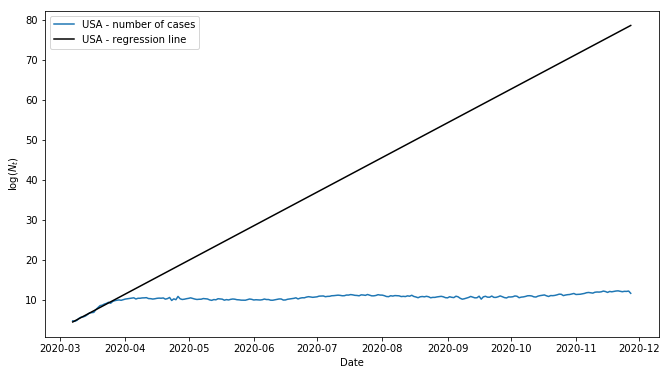

In [135]:
fig = plt.figure(figsize=(11,6))
plt.plot(dfCases.iloc[begin_idx:].index, dfCases['log_USA'].iloc[begin_idx:].values,label="USA - number of cases")
plt.plot(dfCases.iloc[begin_idx:].index, yU.ravel(),color='k',label="USA - regression line")
plt.xlabel('Date')
plt.ylabel('$\log(N_t)$')
plt.legend()

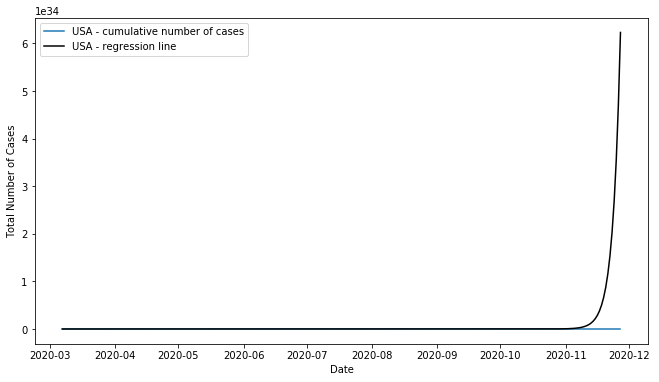

In [136]:
fig = plt.figure(figsize=(11,6))
plt.plot(dfCases.iloc[begin_idx:].index, dfCases['cum_USA'].iloc[begin_idx:].values,label="USA - cumulative number of cases")
plt.plot(dfCases.iloc[begin_idx:].index, np.cumsum(np.exp(yU.ravel())),color='k',label="USA - regression line")
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.legend()

## Fitting sigmoid (logistic) function to cumulative sum of cases - predicting length of quarantine

Cumulative sum of the number of cases for Canada can be approximated by sigmoid (logarithmic) function. We fitted sigmoid function to Canada to model the end of quarantine.

An end of qurantine corresponds to "optimistic" start of recovery time period.

In [71]:
startC = 20 # start from day 20 (January 19)
ydataC = dfCases['cum_Canada'].iloc[startC:].values
ydataC
N_dCan = len(ydataC)
xdataC = range(1,N_dCan+1)

In [72]:
#p0C = [1.2*max(ydataC), 2*np.median(xdataC), 1, min(ydataC)] # this is an mandatory initial guess
p0C = [1.2*max(ydataC), 1.5*np.median(xdataC), 1, min(ydataC)] # this is an mandatory initial guess

poptC, pcovC = curve_fit(sigmoid, xdataC, ydataC, p0C, method='dogbox')

In [73]:
sigCan = []
for j in range(1,N_dCan+1):
    sigCan.append(sigmoid(j,poptC[0],poptC[1],poptC[2],poptC[3]))

In [74]:
sigCan1 = []
for j in range(1,2*(N_dCan+1)):
    sigCan1.append(sigmoid(j,poptC[0],poptC[1],poptC[2],poptC[3]))

In [75]:
datelist1 = pd.date_range(dfCases.iloc[startC:].index.values[0], periods=len(range(1,N_dCan+1)))
datelist2 = pd.date_range(dfCases.iloc[startC:].index.values[0], periods=len(range(1,2*(N_dCan+1))))

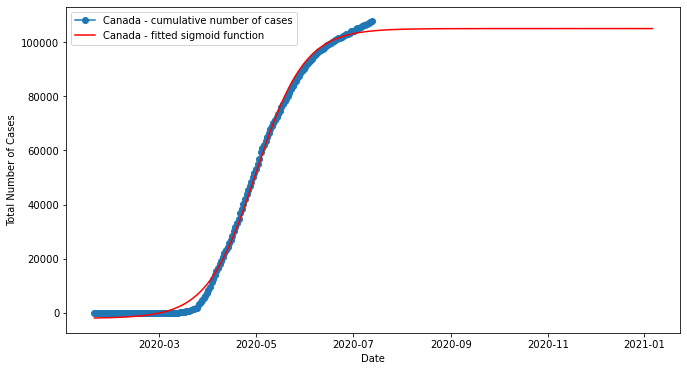

In [76]:
fig = plt.figure(figsize=(11,6))
plt.plot(datelist1, dfCases['cum_Canada'].iloc[startC:].values, marker='o', label="Canada - cumulative number of cases")
plt.plot(datelist2, sigCan1, color='r',label="Canada - fitted sigmoid function")
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.legend()

In [77]:
# end of quarantine in Canada (May 5)
endQ_Canada = dt.datetime(2020, 5, 18)

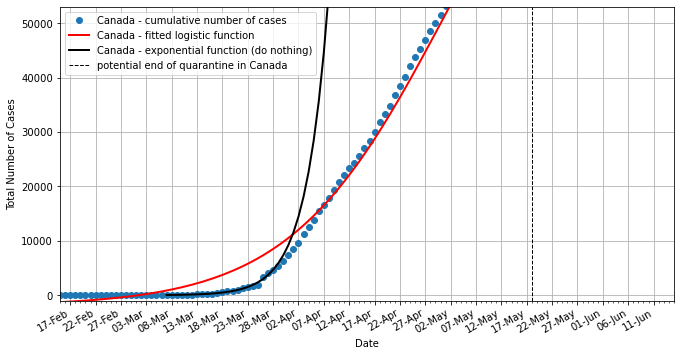

In [78]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

ax.plot(datelist1, dfCases['cum_Canada'].iloc[startC:].values, marker='o', linestyle='None', label="Canada - cumulative number of cases")
ax.plot(datelist2, sigCan1, color='r', linewidth=2, label="Canada - fitted logistic function")
ax.plot(dfCases.iloc[begin_idx:begin_idx+34].index, np.exp(yCa[0:34].ravel()), linewidth=2, color='k',label="Canada - exponential function (do nothing)")
plt.axvline(endQ_Canada, linestyle='--', color='k', linewidth=1, label="potential end of quarantine in Canada")

ax.set_xlim([dt.date(2020, 2, 15), dt.date(2020, 6, 15)])
ax.set_ylim([-1000, 53000])
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.legend()

fig.autofmt_xdate()

ax.grid(True)
#plt.savefig('Canada_COVID_sigmoid_fit_with_exp.png', format='png', bbox_inches='tight', dpi=600)
plt.show()

In [80]:
print("Canada current cases, total cases:", dfCases['cum_Canada'].values[-1],sigCan1[-1])

Canada current cases, total cases: 107579.0 104957.2782938741


## Part 5: Using the Analysis from Part 3 and 4 to derive insights about policy and guidance

Some examples of policy and guidance that can be derived from the above analysis is:

* Policies to inform when to shut down
* Policies to inform when we can start opening back up again based on what the model shows
* When to impose stricter measures in the phased re-openings - when data deviates from model

All insights should be linked back to the models and data visualizations and tied back in with how the models allow you to reach you conclusions. 


Here the Policy and Insights will depend directly on what you chose to model and how you chose to model it 